In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as ply
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio

In [2]:
df = pd.read_csv("Main_Data.csv")

In [3]:
df.head()

,cast,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,...,actor_2,actor_3,director_frequency,director_avg_rating,actor_1_frequency,actor_1_avg_rating,actor_2_frequency,actor_2_avg_rating,actor_3_frequency,actor_3_avg_rating
0,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",862,1,30000000.0,"['Animation', 'Comedy', 'Family']",en,Toy Story,21.946943,Pixar Animation Studios,['US'],...,Tim Allen,Don Rickles,10.0,6.720000,42.0,6.700000,10.0,6.65000,4.0,5.250000
1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",8844,0,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,Jumanji,17.015540,TriStar Pictures,['US'],...,Jonathan Hyde,Kirsten Dunst,10.0,6.200000,42.0,6.180952,2.0,6.20000,7.0,6.728571
2,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",15602,1,16500000.0,"['Romance', 'Comedy']",en,Grumpier Old Men,11.712900,Warner Bros.,['US'],...,Jack Lemmon,Ann-Margret,11.0,5.963636,24.0,6.500000,10.0,6.73000,7.0,6.371429
3,"['Whitney Houston', 'Angela Bassett', 'Loretta...",31357,0,16000000.0,"['Comedy', 'Drama', 'Romance']",en,Waiting to Exhale,3.859495,Twentieth Century Fox Film Corporation,['US'],...,Angela Bassett,Loretta Devine,4.0,5.075000,4.0,6.050000,10.0,5.76000,6.0,4.650000
4,"['Steve Martin', 'Diane Keaton', 'Martin Short']",11862,1,16500000.0,['Comedy'],en,Father of the Bride Part II,8.387519,Sandollar Productions,['US'],...,Diane Keaton,Martin Short,7.0,5.671429,30.0,6.053333,23.0,6.26087,4.0,6.075000


In [4]:
# Defining the feature matrix and target variable

X = df[['budget','revenue','popularity','release_year','release_month','director_frequency','director_avg_rating', 'actor_1_frequency', 'actor_1_avg_rating',
        'actor_2_frequency', 'actor_2_avg_rating', 'actor_3_frequency', 'actor_3_avg_rating']]
y = df['rating']

print(X.shape,y.shape)

(44453, 13) (44453,)


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (35562, 13), (35562,)
Testing set shape: (8891, 13), (8891,)


In [6]:
## Linear Regression without cross-validation ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"The mean squared error using Linear regression is: {mse}")
print(f"The mean absolute error using Linear regression is: {mae}")

The mean squared error using Linear regression is: 0.18655205384085566
The mean absolute error using Linear regression is: 0.3038267314653281
The R-squared value is: 0.37777533587664713


In [7]:
## Linear Regression with cross-validation ##
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_scores = -cv_scores
print('Cross-validation scores:', cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))
print('Standard Deviation of Cross-Validation Scores:', np.std(cv_scores))

Cross-validation scores: [0.40176341 0.19610422 0.16823355 0.15581578 0.13759005]
Mean Cross-Validation Score: 0.21190140098832128
Standard Deviation of Cross-Validation Scores: 0.0968212667274017


In [8]:
## Linear Regression with cross-validation using Pipeline ##

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Creating a preprocessing and modeling pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                         # Scaling numerical features
    ('regressor', LinearRegression())
])

cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(pipeline, X, y, cv = cv, scoring = 'neg_mean_squared_error')
cv_scores = -cv_scores

print('Cross-validation scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())
print('Standard Deviation of Cross-Validation Scores:', cv_scores.std())

Cross-validation scores: [0.18655205 0.17612746 0.18660978 0.18103673 0.20723085]
Mean Cross-Validation Score: 0.18751137460062095
Standard Deviation of Cross-Validation Scores: 0.010602882690622897


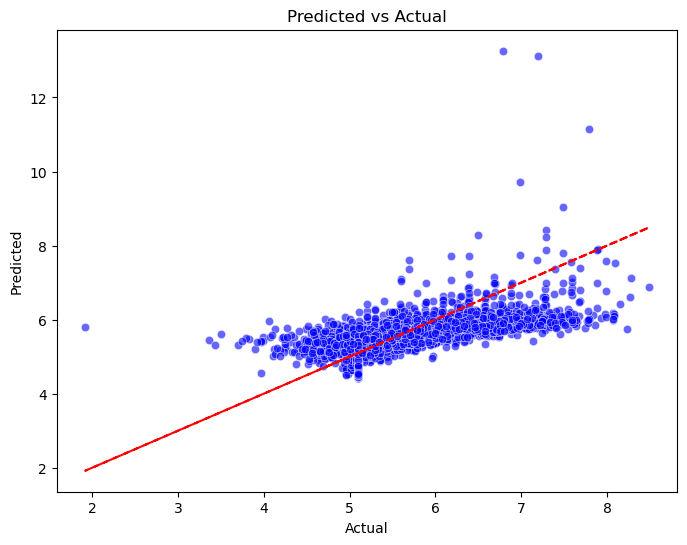

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x= y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting
plot_predicted_vs_actual(y_test, y_pred)

In [10]:
#### L1 regularization(Lasso Regression) with pre-defined alpha ###########
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)
print('The mean squared error using Lasso regression is:', mse_lasso)
print('The mean absolute error using Lasso regression is:', mae_lasso)

The mean squared error using Lasso regression is: 0.18675630232250456
The mean absolute error using Lasso regression is: 0.3034929467539133


In [11]:
#### L1 regularization(Lasso Regression) with Hyperparameter tuning using GridSearchCV  ###########
from sklearn.model_selection import GridSearchCV


alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}
grid_search_lasso = GridSearchCV(estimator = Lasso(random_state = 42), param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, refit = True)
grid_search_lasso.fit(X_train, y_train)
print("Best alpha value for Lasso:", grid_search_lasso.best_params_['alpha'])
best_lasso = grid_search_lasso.best_estimator_
y_pred = best_lasso.predict(X_test)

mse_lasso_optimized = mean_squared_error(y_test, y_pred)
mae_lasso_optimized = mean_absolute_error(y_test, y_pred)
print('The mean squared error using optimized Lasso regression is:', mse_lasso_optimized)
print('The mean absolute error using optimized Lasso regression is:', mae_lasso_optimized)

Best alpha value for Lasso: 0.005179474679231213
The mean squared error using optimized Lasso regression is: 0.18663657042223167
The mean absolute error using optimized Lasso regression is: 0.3036371241275065


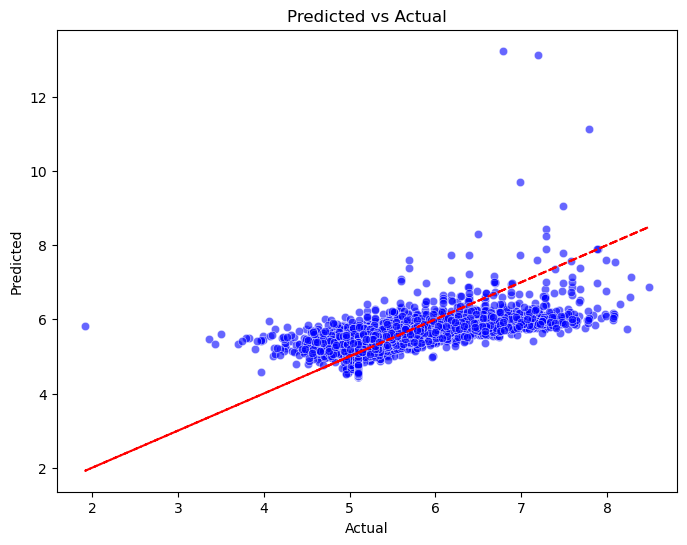

In [12]:
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting
plot_predicted_vs_actual(y_test, y_pred)

In [13]:
#### L1 regularization(Lasso Regression) with Hyperparameter tuning using RandomizedSearchCV ###########
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha_distribution = uniform(loc = 0, scale = 1)

random_search_lasso = RandomizedSearchCV(
    estimator=Lasso(random_state = 42),
    param_distributions={'alpha': alpha_distribution},
    n_iter = 50,  # Number of parameter settings that are sampled
    cv = 5,  # Number of cross-validation folds
    scoring= 'neg_mean_squared_error',
    n_jobs = -1,
    random_state = 42
)

random_search_lasso.fit(X_train, y_train)
print("Best alpha value for Lasso (Randomized Search):", random_search_lasso.best_params_['alpha'])
best_lasso_random = random_search_lasso.best_estimator_
y_pred_random = best_lasso_random.predict(X_test)

mse_lasso_optimized_random = mean_squared_error(y_test, y_pred_random)
mae_lasso_optimized_random = mean_absolute_error(y_test, y_pred_random)
print('The mean squared error using optimized Lasso regression (Randomized Search) is:', mse_lasso_optimized_random)
print('The mean absolute error using optimized Lasso regression (Randomized Search) is:', mae_lasso_optimized_random)


Best alpha value for Lasso (Randomized Search): 0.020584494295802447
The mean squared error using optimized Lasso regression (Randomized Search) is: 0.1871314420037975
The mean absolute error using optimized Lasso regression (Randomized Search) is: 0.3032086564538904


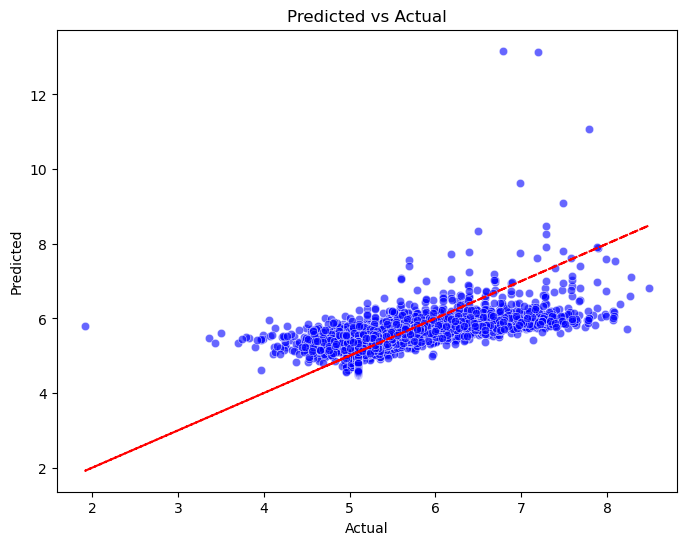

In [14]:
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting
plot_predicted_vs_actual(y_test, y_pred_random)

In [15]:
#### L2 regularization(Ridge Regression) with pre-defined alpha ###########

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

ridge = Ridge(alpha = 1, random_state = 42)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, pred_ridge)
mae_ridge = mean_absolute_error(y_test, pred_ridge)
print('The mean squared error using Ridge regression is:', mse_ridge)
print('The mean absolute error using Ridge regression is:', mae_ridge)

The mean squared error using Ridge regression is: 0.18655209154115887
The mean absolute error using Ridge regression is: 0.3038266799783707


In [16]:
#### L2 regularization(Ridge Regression) with Hyperparameter tuning using GridSearchCV  ###########
from sklearn.model_selection import GridSearchCV

alpha_space = np.logspace(-4, 4, 50)
param_grid = {'alpha': alpha_space}

grid_search_ridge = GridSearchCV(estimator=Ridge(random_state = 42), param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_ridge.fit(X_train, y_train)
print("Best alpha value for Ridge:", grid_search_ridge.best_params_['alpha'])

best_ridge = grid_search_ridge.best_estimator_
pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, pred_ridge)
mae_ridge = mean_absolute_error(y_test, pred_ridge)
print('The mean squared error using optimized Ridge regression is:', mse_ridge)
print('The mean absolute error using optimized Ridge regression is:', mae_ridge)

Best alpha value for Ridge: 494.1713361323828
The mean squared error using optimized Ridge regression is: 0.18657234831703595
The mean absolute error using optimized Ridge regression is: 0.3038025503625509


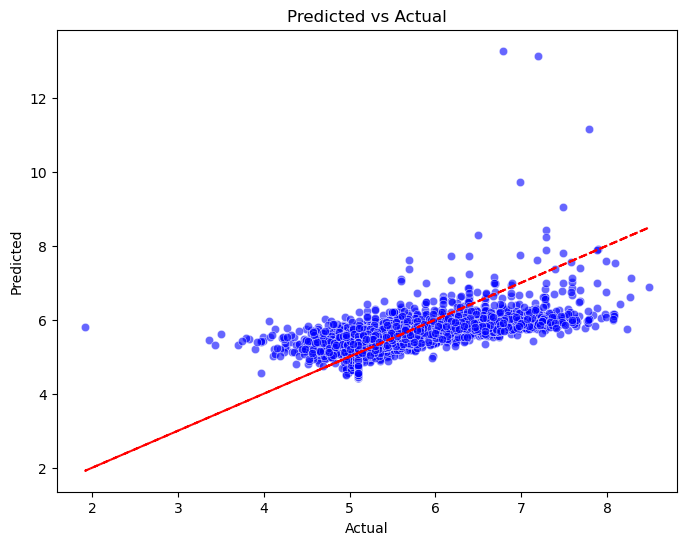

In [17]:
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting
plot_predicted_vs_actual(y_test, pred_ridge)

In [18]:
#### L2 regularization(Ridge Regression) with Hyperparameter tuning using RandomizedSearchCV  ###########
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha_distribution = uniform(loc = 0, scale = 10)
random_search_ridge = RandomizedSearchCV(
    estimator = Ridge(random_state = 42),
    param_distributions = {'alpha': alpha_distribution},
    n_iter = 50,  # Number of parameter settings that are sampled
    cv = 5,  # Number of cross-validation folds
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    random_state = 42
)

random_search_ridge.fit(X_train, y_train)
print("Best alpha value for Ridge (Randomized Search):", random_search_ridge.best_params_['alpha'])

best_ridge_random = random_search_ridge.best_estimator_
pred_ridge_random = best_ridge_random.predict(X_test)

mse_ridge_random = mean_squared_error(y_test, pred_ridge_random)
mae_ridge_random = mean_absolute_error(y_test, pred_ridge_random)
print('The mean squared error using optimized Ridge regression (Randomized Search) is:', mse_ridge_random)
print('The mean absolute error using optimized Ridge regression (Randomized Search) is:', mae_ridge_random)

Best alpha value for Ridge (Randomized Search): 9.699098521619943
The mean squared error using optimized Ridge regression (Randomized Search) is: 0.18655242008831302
The mean absolute error using optimized Ridge regression (Randomized Search) is: 0.30382623214459564


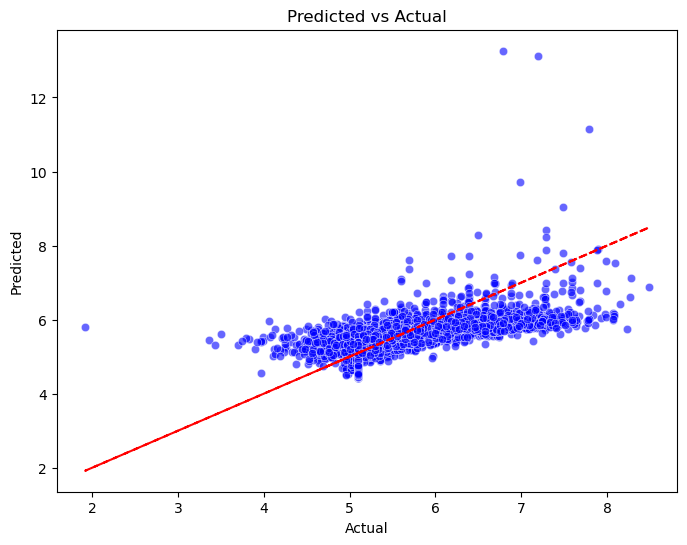

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting
plot_predicted_vs_actual(y_test, pred_ridge_random)

In [20]:
## Decision Tree ####################
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, pred_dt)
mae_dt = mean_absolute_error(y_test, pred_dt)
print('The mean squared error using Decision Tree Regression is:', mse_dt)
print('The mean absolute error using Decision Tree Regression is:', mae_dt)
cv_scores_dt = cross_val_score(dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_scores_dt = np.abs(cv_scores_dt)
print('Cross-validation scores:', cv_scores_dt)
print('Mean Cross-Validation Score:', np.mean(cv_scores_dt))
print('Standard Deviation of Cross-Validation Scores:', np.std(cv_scores_dt))

The mean squared error using Decision Tree Regression is: 0.1284387979777739
The mean absolute error using Decision Tree Regression is: 0.21999914203565363
Cross-validation scores: [0.28424789 0.1384284  0.10161942 0.06677541 0.06958276]
Mean Cross-Validation Score: 0.13213077451625993
Standard Deviation of Cross-Validation Scores: 0.08036640763036433


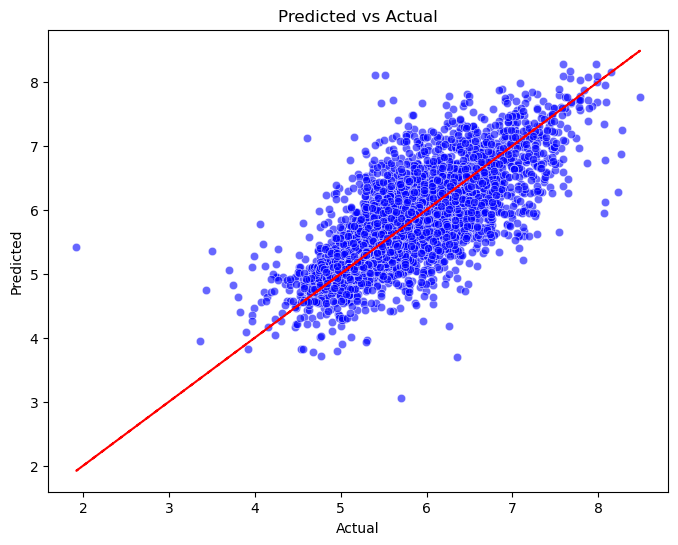

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6)
    plt.plot(y_true, y_true, color='red', linestyle='--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting for Decision Tree Predictions
plot_predicted_vs_actual(y_test, pred_dt)

In [22]:
### Decision Tree with Hyperparameter Tuning using GridSearchCV ###########################
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15]
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
pred_dt = best_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, pred_dt)
mae_dt = mean_absolute_error(y_test, pred_dt)
print('The mean squared error using optimized Decision Tree Regression is:', mse_dt)
print('The mean absolute error using optimized Decision Tree Regression is:', mae_dt)
cv_scores_dt = cross_val_score(best_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_scores_dt = -cv_scores_dt
print('Cross-validation scores:', cv_scores_dt)
print('Mean Cross-Validation Score:', np.mean(cv_scores_dt))
print('Standard Deviation of Cross-Validation Scores:', np.std(cv_scores_dt))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15}
The mean squared error using optimized Decision Tree Regression is: 0.08186529512811333
The mean absolute error using optimized Decision Tree Regression is: 0.17840450973922517
Cross-validation scores: [0.18770297 0.09116575 0.06685753 0.04335623 0.04279735]
Mean Cross-Validation Score: 0.0863759646730618
Standard Deviation of Cross-Validation Scores: 0.0537044989161038


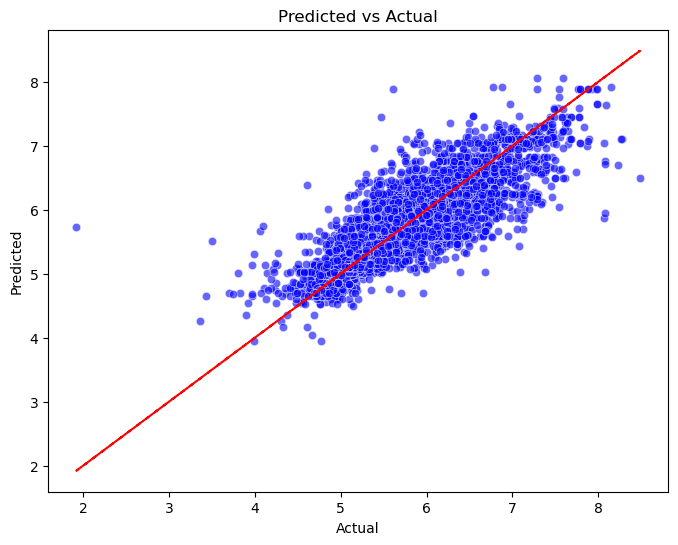

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting for Decision Tree Predictions
plot_predicted_vs_actual(y_test, pred_dt)

In [24]:
### Decision Tree with Hyperparameter Tuning using RandomizedSearchCV ###########################
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_leaf': np.arange(1, 10),
    'min_samples_split': np.arange(2, 20, 2)
}

dt = DecisionTreeRegressor(random_state = 42)
random_search_dt = RandomizedSearchCV(estimator = dt, param_distributions = param_distributions,
                                      n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, random_state = 42)
random_search_dt.fit(X_train, y_train)
print("Best parameters found:", random_search_dt.best_params_)

best_dt = random_search_dt.best_estimator_
pred_dt = best_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, pred_dt)
mae_dt = mean_absolute_error(y_test, pred_dt)
print('The mean squared error using optimized Decision Tree Regression is:', mse_dt)
print('The mean absolute error using optimized Decision Tree Regression is:', mae_dt)

# Cross-validation scores for the optimized Decision Tree Regression
cv_scores_dt = cross_val_score(best_dt, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_scores_dt = -cv_scores_dt
print('Cross-validation scores for the optimized model:', cv_scores_dt)
print('Mean Cross-Validation Score for the optimized model:', np.mean(cv_scores_dt))
print('Standard Deviation of Cross-Validation Scores for the optimized model:', np.std(cv_scores_dt))

Best parameters found: {'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 10}
The mean squared error using optimized Decision Tree Regression is: 0.08027266827638209
The mean absolute error using optimized Decision Tree Regression is: 0.17670601146250034
Cross-validation scores for the optimized model: [0.18509476 0.08983074 0.06581653 0.04213363 0.04248445]
Mean Cross-Validation Score for the optimized model: 0.08507202264966104
Standard Deviation of Cross-Validation Scores for the optimized model: 0.053019569666921236


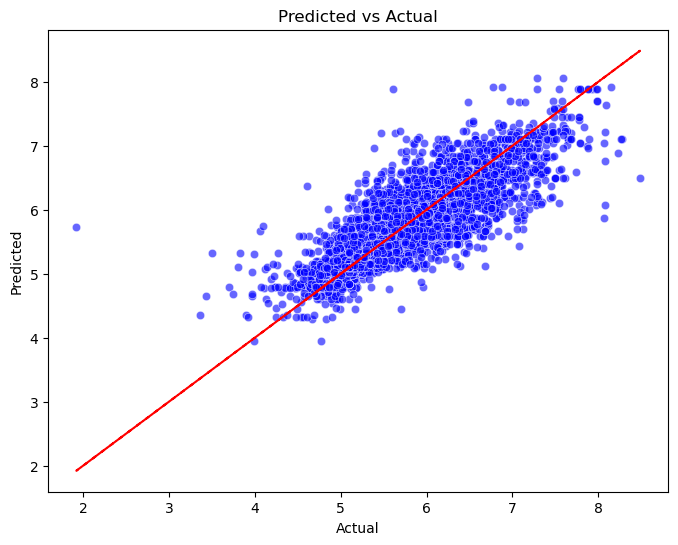

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plotting for Decision Tree Predictions
plot_predicted_vs_actual(y_test, pred_dt)

In [26]:
### Random Forest ##################
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
print('The mean squared error using Random Forest Regression is:', mse_rf)
print('The mean absolute error using Random Forest Regression is:', mae_rf)

cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = np.abs(cv_scores_rf)
print('Cross-validation scores for Random Forest:', cv_scores_rf)
print('Mean Cross-Validation Score for Random Forest:', np.mean(cv_scores_rf))
print('Standard Deviation of Cross-Validation Scores for Random Forest:', np.std(cv_scores_rf))


The mean squared error using Random Forest Regression is: 0.058764136154685856
The mean absolute error using Random Forest Regression is: 0.1494454127594652
Cross-validation scores for Random Forest: [0.15711562 0.06906133 0.04753273 0.03181838 0.03222238]
Mean Cross-Validation Score for Random Forest: 0.06755008737799145
Standard Deviation of Cross-Validation Scores for Random Forest: 0.046796932977521334


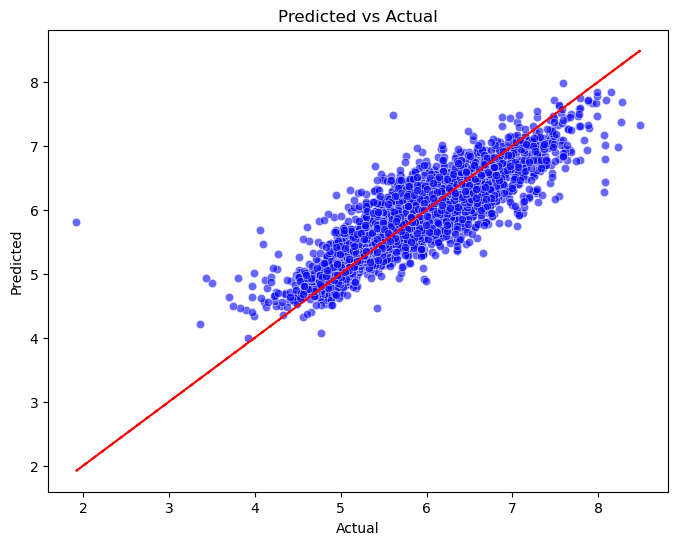

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_predicted_vs_actual(y_test, pred_rf)

In [28]:
### Random Forest with Hyperparameter Tuning using GridSearchCV ###########################
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [10, 50],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_leaf': [2, 4],  # Minimum number of samples required at each leaf node
    'min_samples_split': [5, 10]  # Minimum number of samples required to split an internal node
}


rf = RandomForestRegressor(random_state = 42)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)


best_rf = grid_search_rf.best_estimator_
pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
print('The mean squared error using optimized Random Forest Regression is:', mse_rf)
print('The mean absolute error using optimized Random Forest Regression is:', mae_rf)

cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = np.abs(cv_scores_rf)
print('Cross-validation scores for the optimized Random Forest:', cv_scores_rf)
print('Mean Cross-Validation Score for the optimized Random Forest:', np.mean(cv_scores_rf))
print('Standard Deviation of Cross-Validation Scores for the optimized Random Forest:', np.std(cv_scores_rf))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
The mean squared error using optimized Random Forest Regression is: 0.05935948779388674
The mean absolute error using optimized Random Forest Regression is: 0.14983687186526676
Cross-validation scores for the optimized Random Forest: [0.15846556 0.06988905 0.04819618 0.03210221 0.03236291]
Mean Cross-Validation Score for the optimized Random Forest: 0.06820318087308828
Standard Deviation of Cross-Validation Scores for the optimized Random Forest: 0.04719793461607583


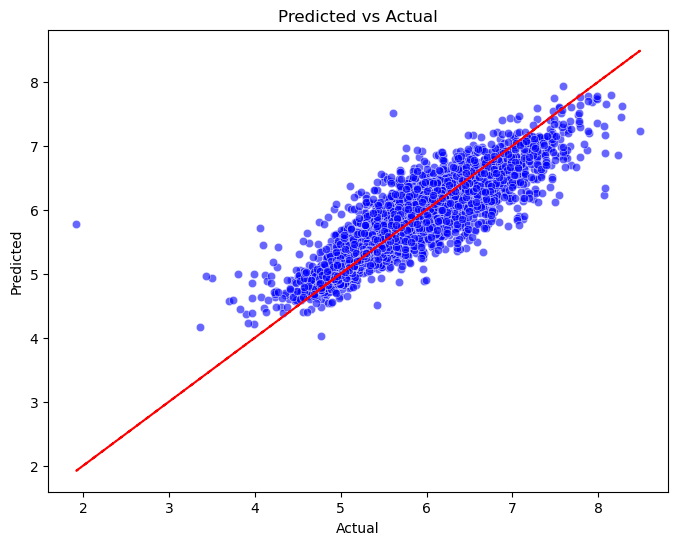

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_predicted_vs_actual(y_test, pred_rf)

In [30]:
### Random Forest with Hyperparameter Tuning using RandomizedSearchCV ###########################
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'n_estimators': [20, 40, 60, 80, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 6, 10]
}


rf = RandomForestRegressor(random_state = 42)

random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions=param_distributions,
                                      n_iter = 100, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, random_state = 42)
random_search_rf.fit(X_train, y_train)
print("Best parameters found:", random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_
pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
print('The mean squared error using optimized Random Forest Regression is:', mse_rf)
print('The mean absolute error using optimized Random Forest Regression is:', mae_rf)

Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
The mean squared error using optimized Random Forest Regression is: 0.05858631701525331
The mean absolute error using optimized Random Forest Regression is: 0.1491609060956306


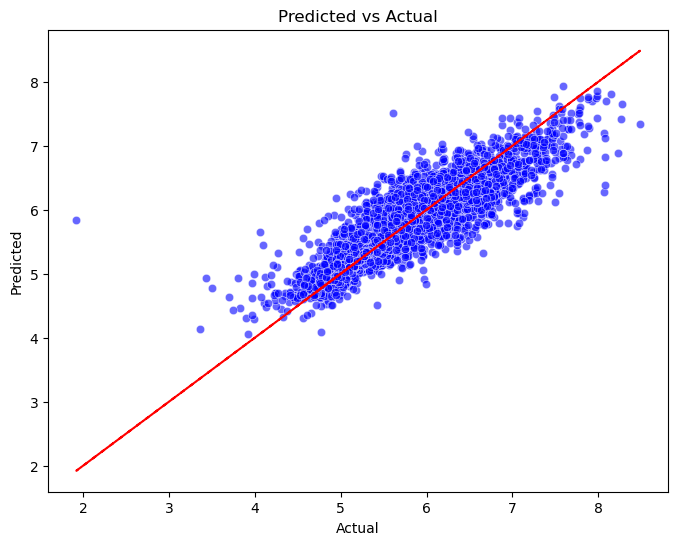

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = y_true, y = y_pred, color = 'blue', alpha = 0.6)
    plt.plot(y_true, y_true, color = 'red', linestyle = '--')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


plot_predicted_vs_actual(y_test, pred_rf)